# Домашнє завдання: Статистичні візуалізації з Seaborn

## Опис завдання
У цьому домашньому завданні ви будете використовувати бібліотеку Seaborn для створення красивих статистичних візуалізацій. Seaborn має кращий стандартний стиль та спеціалізується на статистичних графіках.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - як відчувається температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Завантаження даних
df = pd.read_csv('C:/Users/Hanna/Desktop/DataLoves/data/yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Встановлюємо стиль seaborn
sns.set_theme(style="whitegrid")

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

In [2]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21



---

## Завдання 1: Лінійний графік з довірчими інтервалами

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно з довірчими інтервалами (confidence intervals) рівними 1 стандартному відхиленню.

**УВАГА!** В лекції ми будували подібний графік, але там були дані по номеру місяця, а тут треба зобразити дані в розрізі місяць_рік.

В якості підказки вам наведений код для створення колонки, яка містить `місяць_рік`. Як її використати - вже питання до вас :)

Очікуваний результат:
![](https://drive.google.com/uc?id=1uVKqfY1VlhVMaM3wu99uVGT1f7S0Vf8S)

**Питання для інтерпретації:**
- В які місяці найбільша невизначеність в даних?

In [3]:
df['month_year'] = df.index.to_period('M')
df['month_year']  = df.month_year.astype(str)

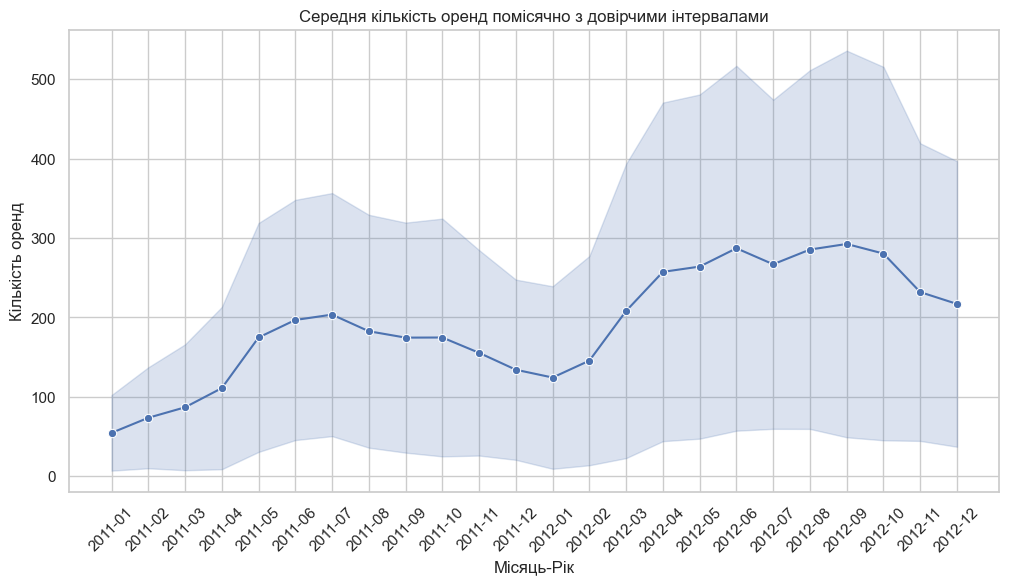

In [4]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df,
    x="month_year",
    y="count",   
    errorbar="sd",
    marker="o"
)

plt.title("Середня кількість оренд помісячно з довірчими інтервалами")
plt.xlabel("Місяць-Рік")
plt.ylabel("Кількість оренд")
plt.xticks(rotation=45)
plt.show()

Найбільша невизначеність у даних спостерігається у літні місяці 2012 року (червень–серпень), а також у середині 2011 року.

## Завдання 2: Порівняння стилів - Pandas vs Seaborn гістограма

**Завдання:**
Побудуйте гістограму розподілу температури двома способами - з Pandas та Seaborn - та порівняйте візуальний вигляд. Задайте однакову кількість бінів в цих візуалізаціях, відмінну від стандартної. В візуалізації Seaborn додайте параметр при побудові `kde=True`.

**Функція Seaborn: `sns.histplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

**Дайте відповідь на питання:**
1. Яка візуальна різниця між Pandas та Seaborn гістограмами?
2. Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?

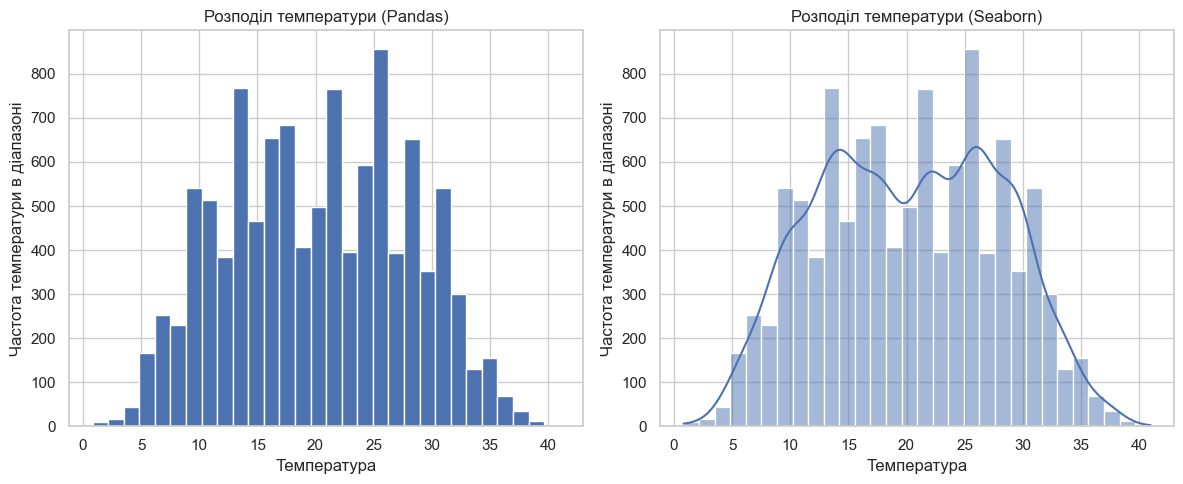

In [5]:
plt.figure(figsize=(12, 5))

# 1. Pandas гістограма
plt.subplot(1, 2, 1)
df["temp"].hist(bins=30)   # bins підбери однакові і для sns
plt.title("Розподіл температури (Pandas)")
plt.xlabel("Температура")
plt.ylabel("Частота температури в діапазоні")

# 2. Seaborn гістограма
plt.subplot(1, 2, 2)
sns.histplot(df["temp"], bins=30, kde=True)
plt.title("Розподіл температури (Seaborn)")
plt.xlabel("Температура")
plt.ylabel("Частота температури в діапазоні")

plt.tight_layout()
plt.show()

- Яка візуальна різниця між Pandas та Seaborn гістограмами?
Pandas гістограма виглядає простіше: лише стовпчики з кількістю спостережень у кожному діапазоні. Seaborn виглядає візуально приємніше та стильніше: сітка тонша, стовпчики прозорі, є можливість швидко додавати додаткуову статистичну інформацію. 
- Що за лінія додаткова на графіку в Seaborn? Як вона називається і як ви б її описали своїми словами?
Додаткова лінія — це ядерна оцінка щільності (KDE). Вона показує згладжену форму розподілу даних і допомагає виявити піки та загальну тенденцію, на відміну від “сходинок” гістограми

## Завдання 3: Box Plot порівняння - Pandas vs Seaborn

**Завдання:**
Побудуйте box plot для кількості погодинних оренд велосипедів за погодними умовами з Pandas та Seaborn.

**Функція Seaborn: `sns.boxplot()`**

Можна побудувати окремо два графіки. Але для тих, хто хоче складніше - побудуйте ці 2 графіки на 1 фігурі.

Просунуте доповнення:
- підпишіть погодні умови їх інтерпретацією з опису даних в обох графіках

**Дайте відповідь на питання:**
- Яка візуальна різниця між Pandas та Seaborn бокс-плотами?

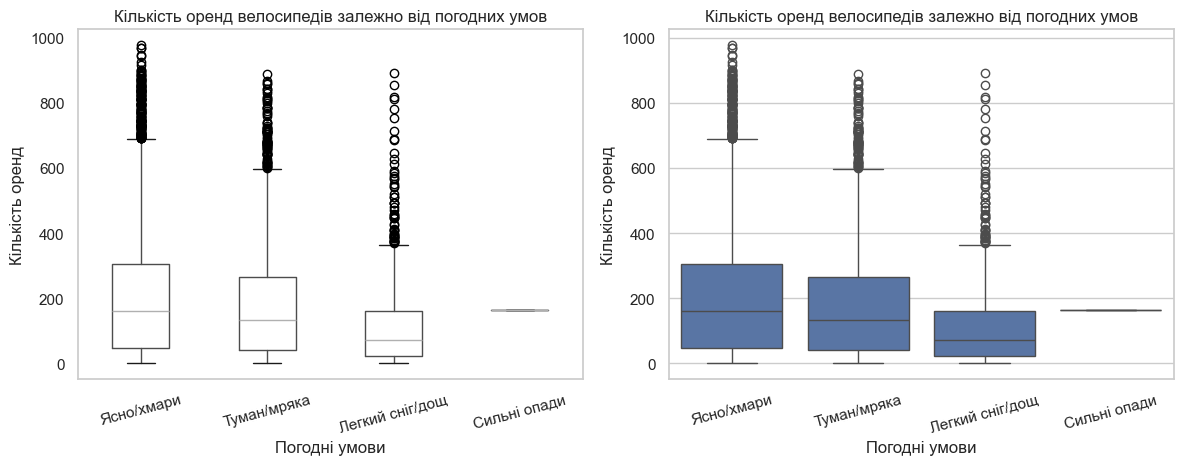

In [6]:
order = [1, 2, 3, 4]
labels = ["Ясно/хмари", "Туман/мряка", "Легкий сніг/дощ", "Сильні опади"]

df["weather"] = pd.Categorical(df["weather"], categories=order, ordered=True)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Pandas boxplot
df.boxplot(column="count", by="weather", grid=False, ax=axes[0])
axes[0].set_title("Кількість оренд велосипедів залежно від погодних умов")
axes[0].set_xlabel("Погодні умови")
axes[0].set_ylabel("Кількість оренд")
axes[0].set_xticks(range(1, len(order) + 1))
axes[0].set_xticklabels(labels, rotation=15)
fig.suptitle("")

# Seaborn boxplot
sns.boxplot(data=df, x="weather", y="count", order=order, ax=axes[1])
axes[1].set_title("Кількість оренд велосипедів залежно від погодних умов")
axes[1].set_xlabel("Погодні умови")
axes[1].set_ylabel("Кількість оренд")
axes[1].set_xticks(range(len(order)))
axes[1].set_xticklabels(labels, rotation=15)

plt.tight_layout()
plt.show()

Pandas виглядає більш базово та мінімалістично, у той час як Seaborn - візуально приємніший та більш гнучкий.

<!-- - -->
## Завдання 4: Heatmap кореляційної матриці

**Завдання:**
Створіть із Seaborn кореляційну матрицю з забарвленням heatmap (колір відповідає величині значення в клітинці) числових змінних в наших даних з анотаціями значень.

**Дайте відповіді на питання по графіку:**
1. Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
2. Яка кореляція між temp та atemp? Чому?
3. Які змінні мають негативну кореляцію?


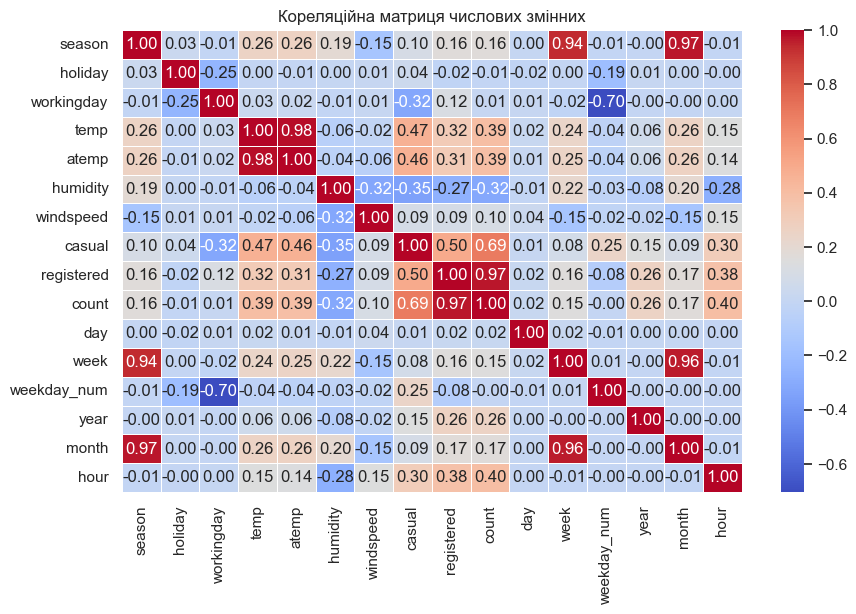

In [8]:
corr = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Кореляційна матриця числових змінних")
plt.show()

- Які змінні найсильніше корелюють з загальною кількістю оренди (count)?
Найсильніший зв’язок мають registered (0.97) та casual (0.69), адже вони напряму складають загальне значення count. Із погодних факторів помітна позитивна кореляція з temp та atemp (≈0.39) — у тепліші дні оренд більше.
- Яка кореляція між temp та atemp? Чому?
Між ними майже ідеальна кореляція (0.99), оскільки atemp — це похідна змінна («як відчувається температура»), яка розраховується на основі фактичної температури (temp) з урахуванням вологості та вітру.
- Які змінні мають негативну кореляцію?
Негативну кореляцію з count мають humidity (–0.32) та windspeed (–0.10): чим вища вологість або сильніший вітер, тим менше оренд велосипедів.

## Завдання 5: Violin Plot для глибокого аналізу розподілів

**Завдання:**
Створіть violin plot для аналізу розподілу оренди за сезонами.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показує "товщина" violin plot?
2. В якому сезоні найбільша варіабельність оренди?
3. Яка перевага violin plot над звичайним box plot?


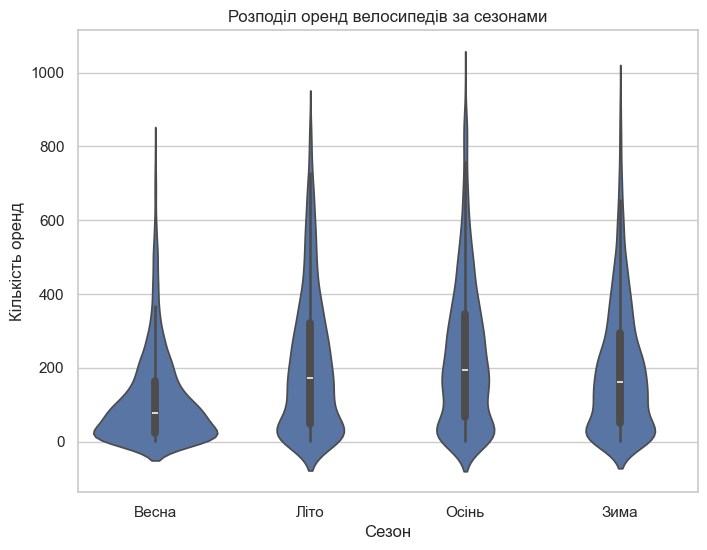

In [9]:
season_labels = {1: "Весна", 2: "Літо", 3: "Осінь", 4: "Зима"}

plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x="season", y="count")
plt.xticks(ticks=[0, 1, 2, 3], labels=[season_labels[i] for i in range(1, 5)])

plt.title("Розподіл оренд велосипедів за сезонами")
plt.xlabel("Сезон")
plt.ylabel("Кількість оренд")
plt.show()

- Що показує "товщина" violin plot?
Товщина скрипки відображає щільність розподілу даних: чим ширший графік у певній ділянці, тим більше значень спостерігається в цьому інтервалі.
- В якому сезоні найбільша варіабельність оренди?
Найбільший розмах і різноманітність значень видно влітку, де кількість оренд коливається від дуже малих до пікових значень понад 1000.
- Яка перевага violin plot над звичайним box plot?
На відміну від box plot, violin plot показує не лише медіану й квартилі, а й повну форму розподілу даних (згладжені піки, симетричність, можливі мультимодальні розподіли). Це дає більше інформації про структуру даних.

## Завдання 6: Pairplot для мультиваріативного аналізу

**Завдання:**
Створіть pairplot для аналізу взаємозв'язків між ключовими змінними `'temp', 'humidity', 'windspeed', 'count'` . В якості візуальної розбивки за категоріями (параметр `hue`) додайте сезон.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Між якими змінними спостерігається найсильніший лінійний зв'язок?
2. Яка характеристика найбільше змінюється від сезону?

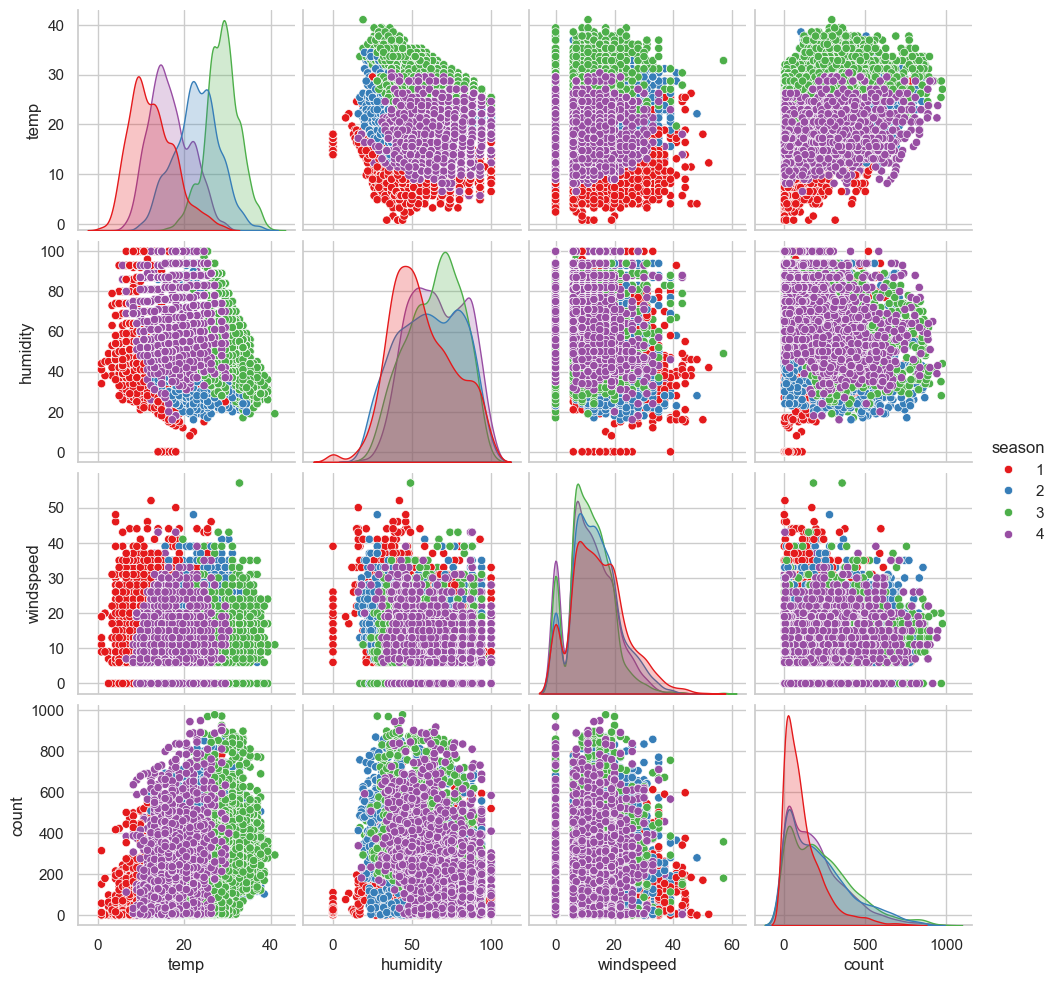

In [10]:
cols = ["temp", "humidity", "windspeed", "count"]

sns.pairplot(df[cols + ["season"]], hue="season", diag_kind="kde", palette="Set1")
plt.show()

- Між якими змінними спостерігається найсильніший лінійний зв'язок?
Між temp та count: зі зростанням температури кількість оренд зростає.
- Яка характеристика найбільше змінюється від сезону?
Найбільше від сезону змінюється температура — розподіли по сезонах майже не перетинаються

## Завдання 7: Joint Plot для детального аналізу двох змінних

**Завдання:**
Проаналізуйте залежність між температурою та орендою за допомогою joint plot. В якості візуальної розбивки за категоріями (параметр `hue`) додайте `workingday`.

Дайте відповіді на питання:

**Питання для інтерпретації:**
1. Що показують графіки по краях?
2. Чи є різниця у поведінці користувачів у робочий і неробочий день?

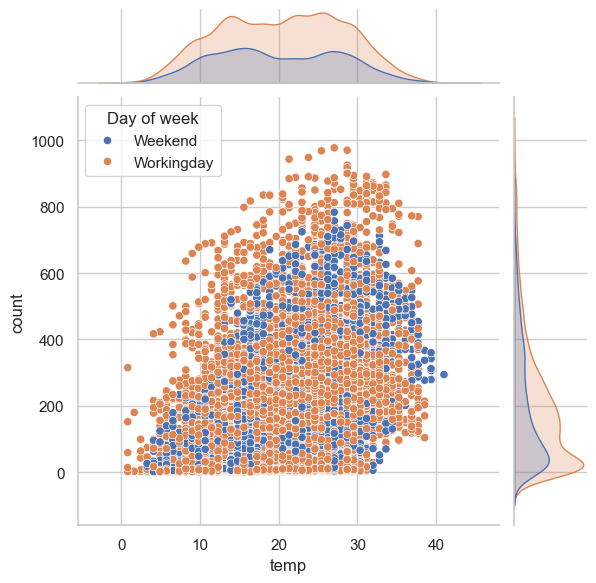

In [12]:
df["Day of week"] = df["workingday"].map({0: "Weekend", 1: "Workingday"})
sns.jointplot(
    data=df,
    x="temp", 
    y="count",
    hue="Day of week",  
    kind="scatter"    
)

plt.show()

- Що показують графіки по краях?
По краях показані розподіли змінних: зверху – температура, праворуч – кількість оренд, тобто які значення трапляються найчастіше.
- Чи є різниця у поведінці користувачів у робочий і неробочий день?
У неробочі дні оренди більше при теплій погоді, а в робочі дні вони більш рівномірно розподілені незалежно від температури.